<a href="https://colab.research.google.com/github/nadunchanna98/machine-learning/blob/main/Nonlinear_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2019E094  Machine Learning Assignment 3

###Keras datasets.ANN for classification and regression.


###1 ) Use the Boston housing dataset from Keras for this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the Boston housing dataset from Keras
boston_housing = keras.datasets.boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
# Display the head of the data
print("Train data:")
print(train_data[:5])  # Display the first 5 rows of the train_data
print("Train targets:")
print(train_targets[:5])  # Display the first 5 rows of the train_targets

Train data:
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]
Train targets:
[15.2 42.3 50.  21.1 17.7]


###2 ) Load that dataset directly from Keras using Python.

In [6]:
# Step 2: Preprocess the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

### 3 ) Fit an ANN model to predict the house price on the above data. Choose proper activation functions and number of hidden layers.

In [7]:
# Step 3: Build and train the ANN model
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(train_data, train_targets, epochs=100, batch_size=16, verbose=0)

### 4 ) Use your model on the test data and evaluate your model.


In [8]:
# Step 4: Evaluate the model on the test data
test_loss = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.0641


### 5) Plot the actual target against the predicted target value.

4/4 [==============================] - 1s 9ms/step


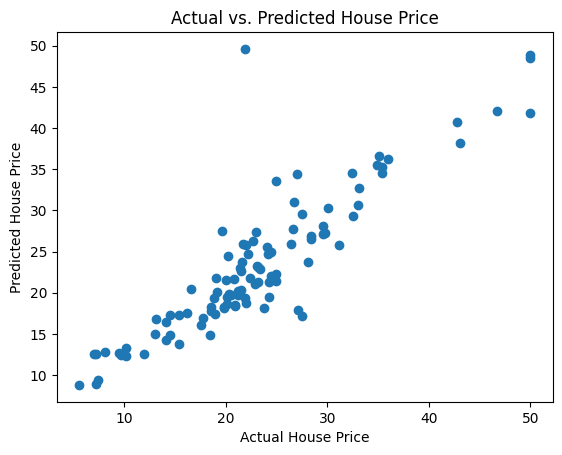

In [9]:
# Step 5: Plot the actual target against the predicted target values
predictions = model.predict(test_data).flatten()
plt.scatter(test_targets, predictions)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs. Predicted House Price')
plt.show()